In [2]:
from prep_data import import_and_merge_cifar10
from prep_data import visualize_images
from prep_data import kfold_data_split
from prep_data import create_cross_entropy_loss
from prep_data import create_adam_optimizer
from prep_data import train_and_evaluate
from prep_data import plot_training_progress
from custom_model import CustomModel

## Load CIFAR10 Dataset

In [3]:
merged_dataset = import_and_merge_cifar10()
print("Total number of samples in the merged dataset:", len(merged_dataset))

Files already downloaded and verified
Files already downloaded and verified
Total number of samples in the merged dataset: 60000


## Visualize the images and their labels

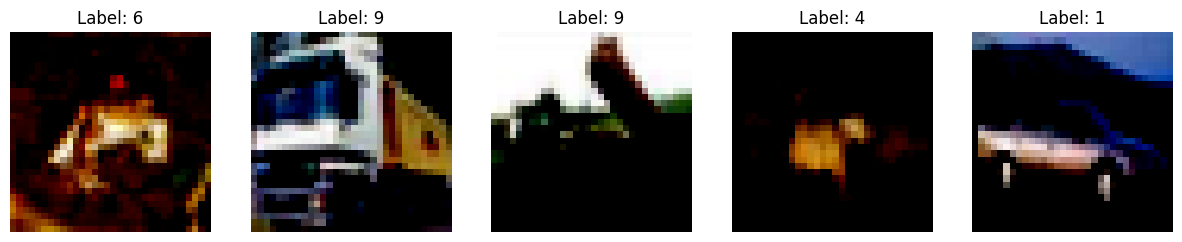

In [7]:
num_samples_to_visualize = 5
sample_images = [merged_dataset[i][0] for i in range(num_samples_to_visualize)]
sample_labels = [merged_dataset[i][1] for i in range(num_samples_to_visualize)]
visualize_images(sample_images, sample_labels)

## Set the hyperparameters

In [9]:
learning_rate = 1e-3
weight_decay = 1e-5
batch_size = 32
dropout_prob = 0.15
hidden_neurons = 30
num_epochs = 10
num_folds = 6

## Create folds

In [10]:
dataloaders = kfold_data_split(merged_dataset, batch_size=batch_size, num_folds=num_folds)

## Model Setting

In [12]:
# Create the model
input_size = 3 * 32 * 32  # Assuming CIFAR-10 images
num_classes = 10
model = CustomModel(input_size, hidden_neurons, num_classes, dropout_prob)

# Define Cross Entropy Loss and Adam optimizer
criterion = create_cross_entropy_loss()
optimizer = create_adam_optimizer(model, learning_rate=learning_rate, weight_decay=weight_decay)

## Model Training and Evaluating

In [13]:
print(f"\nTraining and evaluating with {num_epochs} epochs...\n")
train_losses, train_accuracies, val_losses, val_accuracies = train_and_evaluate(
        model, dataloaders[0], dataloaders[1], num_epochs, criterion, optimizer
    )
print("\nTraining and evaluating with {num_epochs} epochs were successfully completed.")


Training and evaluating with 10 epochs...

Episode 1/10: Train Loss: 1.8180, Train Accuracy: 0.3559, Val Loss: 1.6659, Val Accuracy: 0.4117
Episode 2/10: Train Loss: 1.6997, Train Accuracy: 0.3961, Val Loss: 1.6025, Val Accuracy: 0.4384
Episode 3/10: Train Loss: 1.6588, Train Accuracy: 0.4119, Val Loss: 1.5626, Val Accuracy: 0.4550
Episode 4/10: Train Loss: 1.6317, Train Accuracy: 0.4226, Val Loss: 1.5461, Val Accuracy: 0.4584
Episode 5/10: Train Loss: 1.6075, Train Accuracy: 0.4289, Val Loss: 1.5265, Val Accuracy: 0.4712
Episode 6/10: Train Loss: 1.5914, Train Accuracy: 0.4343, Val Loss: 1.5139, Val Accuracy: 0.4701
Episode 7/10: Train Loss: 1.5824, Train Accuracy: 0.4411, Val Loss: 1.5075, Val Accuracy: 0.4771
Episode 8/10: Train Loss: 1.5716, Train Accuracy: 0.4455, Val Loss: 1.5127, Val Accuracy: 0.4756
Episode 9/10: Train Loss: 1.5596, Train Accuracy: 0.4494, Val Loss: 1.4898, Val Accuracy: 0.4799
Episode 10/10: Train Loss: 1.5511, Train Accuracy: 0.4516, Val Loss: 1.4923, Val Ac

## Accuracies and Losses Plots

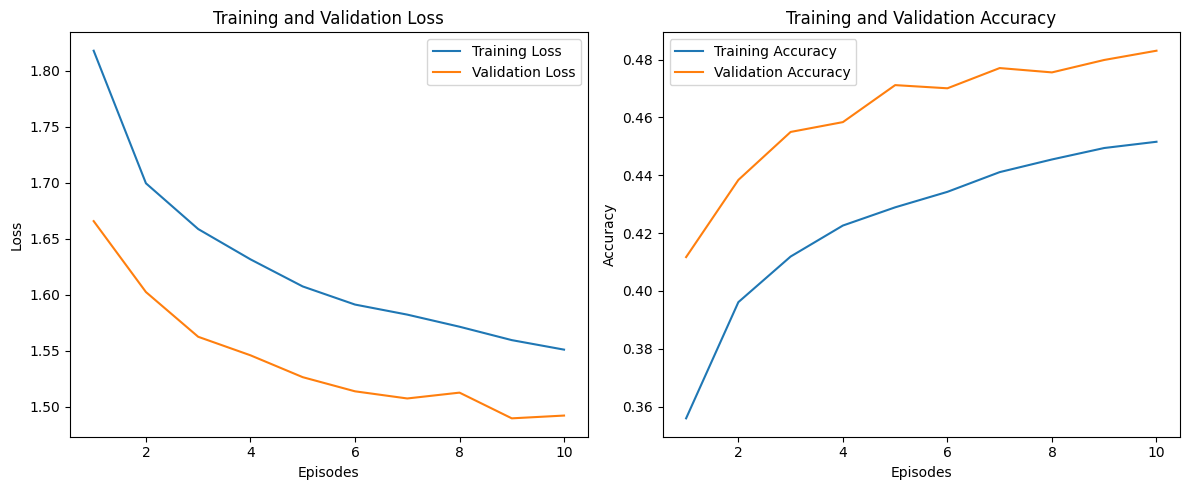

In [14]:
plot_training_progress(train_losses, train_accuracies, val_losses, val_accuracies)